# Upload data

In [105]:
import pandas as pd
import GEOparse
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
gse = GEOparse.get_GEO(geo="GSE26728", destdir="./")

05-Apr-2020 22:35:50 DEBUG utils - Directory ./ already exists. Skipping.
05-Apr-2020 22:35:50 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE26nnn/GSE26728/soft/GSE26728_family.soft.gz to ./GSE26728_family.soft.gz
100%|██████████| 9.32M/9.32M [00:38<00:00, 256kB/s] 
05-Apr-2020 22:36:30 DEBUG downloader - Size validation passed
05-Apr-2020 22:36:30 DEBUG downloader - Moving /tmp/tmpjhk84ome to /home/for_x_in_rage/JetBrainsInternship/JetBrains_Internship_ADEML_Task1/GSE26728_family.soft.gz
05-Apr-2020 22:36:30 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE26nnn/GSE26728/soft/GSE26728_family.soft.gz
05-Apr-2020 22:36:30 INFO GEOparse - Parsing ./GSE26728_family.soft.gz: 
05-Apr-2020 22:36:30 DEBUG GEOparse - DATABASE: GeoMiame
05-Apr-2020 22:36:30 DEBUG GEOparse - SERIES: GSE26728
05-Apr-2020 22:36:30 DEBUG GEOparse - PLATFORM: GPL7042
/home/for_x_in_rage/anaconda3/lib/python3.7/site-packages/GEOparse/GEOparse.py:104: DtypeWarn

In [3]:
control_name = ['GSM658075','GSM658076','GSM658077','GSM658078','GSM658079','GSM658080']
low_dose_name = ['GSM658081','GSM658082','GSM658082','GSM658084','GSM658085','GSM658086']
high_dose_name = ['GSM658087','GSM658088','GSM658089','GSM658090','GSM658091','GSM658092']

# Количество генов в исследовании

**22514** гена,  дупликатов нет

In [67]:
num_of_samples = []

control_list, low_dose_list, high_dose_list = [], [], []

# print number of unique genes in experiments
# and separate data by groups: control, low dose, high dose
for gsm_name, gsm in gse.gsms.items():
    
    num_genes = gsm.table.shape[0]
    num_unique = len(gsm.table.ID_REF.unique())
    
    if gsm_name in control_name:
        control_list.append(gsm.table.set_index('ID_REF'))
    elif gsm_name in low_dose_name:
        low_dose_list.append(gsm.table.set_index('ID_REF'))
    elif gsm_name in high_dose_name:
        high_dose_list.append(gsm.table.set_index('ID_REF'))
    
    if num_genes in num_of_samples:
        continue
    
    num_of_samples.append(num_genes)

    print('Number of genes: ', num_genes)
    print('Number of unique samples: ', num_unique)

Number of genes:  22514
Number of unique samples:  22514


In [65]:
control = pd.concat(control, axis = 1, join='inner')

In [66]:
control.head()

,VALUE,VALUE,VALUE,VALUE,VALUE,VALUE
ID_REF,,,,,,
A_51_P100034,12.630,11.899,12.393,12.539,12.368,12.361
A_51_P100063,5.828,6.598,5.984,5.986,6.089,6.163
A_51_P100099,7.638,7.635,7.216,7.767,7.516,7.378
A_51_P100155,10.947,10.582,10.406,11.054,10.770,10.402
A_51_P100174,6.632,6.089,6.012,6.190,6.260,6.131


In [68]:
# Create dataframes for each group of samples
# containing all the data for each gene
control = pd.concat(control_list, axis = 0)
low_dose = pd.concat(low_dose_list, axis = 0)
high_dose = pd.concat(high_dose_list, axis = 0)

# Cредние значения экспресии каждого из генов в контроле, low_dose и high_dose. 

In [38]:
# Dataframes with mean values of expression for each gene in each group
control_mean = control.groupby(by='ID_REF').mean()
low_dose_mean = low_dose.groupby(by='ID_REF').mean()
high_dose_mean = high_dose.groupby(by='ID_REF').mean()

# Построение классификаторов control vs low_dose, control vs high_dose

In [103]:
def create_dataset(dose, control):
    '''Function that transform dataframes with dose and genes into X,y dataset'''
    dose = dose.transpose()
    control = control.transpose()
    dataset = pd.concat([dose,control], axis = 0)
    dataset['Y'] = np.array([0]*len(dose)+[1]*len(control))
    dataset = dataset.sample(frac=1)
    y=dataset['Y']
    X=dataset.drop(columns=['Y'],axis=1)
    return X,y

In [82]:
# prepare dataframe
control_dataset = pd.concat(control_list, axis = 1, join='inner')
low_dose_dataset = pd.concat(low_dose_list, axis = 1, join='inner')
high_dose_dataset = pd.concat(high_dose_list, axis = 1, join='inner')

In [94]:
X,y = create_dataset(low_dose_dataset, control_dataset)

In [106]:

classification_tree = tree.DecisionTreeClassifier(max_depth = 2)
classification_tree = RandomForestClassifier(max_depth = 2)

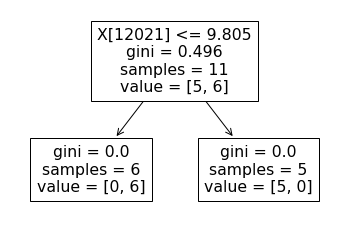

In [102]:
classification_tree = classification_tree.fit(X,y)
_ = tree.plot_tree(classification_tree.fit(X,y))

In [98]:
np.unique(classification_tree.feature_importances_)[-20:]

array([0., 1.])